# Exploratory Data Analysis (EDA) IPL Analysis 2008 To 2019

In [1]:
import numpy as np              # used to read and preprocess data
import seaborn as sns           # used to working with arrays Single or MultiDiementional
import pandas as pd             # Visualisation of data
import matplotlib.pyplot as plt # Visualisation of data
%matplotlib inline 

In [2]:
data=pd.read_csv('matches.csv')

In [3]:
data.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [4]:
data.shape

(756, 18)

### Data Cleaning Process

In [5]:
# removing unwanted coloumns
columns_to_remove = ['id','umpire1','umpire2','umpire3']
data.drop(labels=columns_to_remove,axis=1,inplace=True)

In [6]:
data.head()

,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue
0,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal"
1,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium
2,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium
3,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium
4,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium


In [7]:
data['team1'].unique()

array(['Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Royal Challengers Bangalore',
       'Kolkata Knight Riders', 'Delhi Daredevils', 'Kings XI Punjab',
       'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Rising Pune Supergiants',
       'Delhi Capitals'], dtype=object)

In [8]:
data['team2'].unique()

array(['Royal Challengers Bangalore', 'Rising Pune Supergiant',
       'Kolkata Knight Riders', 'Kings XI Punjab', 'Delhi Daredevils',
       'Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rajasthan Royals', 'Chennai Super Kings', 'Deccan Chargers',
       'Pune Warriors', 'Kochi Tuskers Kerala', 'Rising Pune Supergiants',
       'Delhi Capitals'], dtype=object)

### Eliminating redundancy
 There were two entries for the same city as 'Delhi Daredevils' and 'Delhi Capitals'
 Also we will consider those cities which are regular from first season to last season   

In [9]:
data.at[data['team1']=='Delhi Daredevils','team1']='Delhi Capitals'
data.at[data['team2']=='Delhi Daredevils','team2']='Delhi Capitals'
data.at[data['winner']=='Delhi Daredevils','winner']='Delhi Capitals'

In [10]:
consistent_teams = ['Royal Challengers Bangalore',
       'Kolkata Knight Riders', 'Kings XI Punjab',
       'Sunrisers Hyderabad', 'Mumbai Indians', 
       'Rajasthan Royals', 'Chennai Super Kings',      
       'Delhi Capitals']

In [11]:
data = data[(data['team1'].isin(consistent_teams)) & (data['team2'].isin(consistent_teams))]

In [12]:
print(data['team1'].unique())
print(data['team2'].unique())

['Sunrisers Hyderabad' 'Royal Challengers Bangalore'
 'Kolkata Knight Riders' 'Kings XI Punjab' 'Delhi Capitals'
 'Mumbai Indians' 'Chennai Super Kings' 'Rajasthan Royals']
['Royal Challengers Bangalore' 'Delhi Capitals' 'Mumbai Indians'
 'Kings XI Punjab' 'Kolkata Knight Riders' 'Sunrisers Hyderabad'
 'Rajasthan Royals' 'Chennai Super Kings']


In [13]:
data.head()

,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue
0,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal"
4,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Capitals,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium
6,2017,Mumbai,2017-04-09,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,4,N Rana,Wankhede Stadium
7,2017,Indore,2017-04-10,Royal Challengers Bangalore,Kings XI Punjab,Royal Challengers Bangalore,bat,normal,0,Kings XI Punjab,0,8,AR Patel,Holkar Cricket Stadium
9,2017,Mumbai,2017-04-12,Sunrisers Hyderabad,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,4,JJ Bumrah,Wankhede Stadium


In [14]:
data.shape

(571, 14)

### Final Result Of All Season

Text(0, 0.5, 'Total no. of matches (2008-2019)')

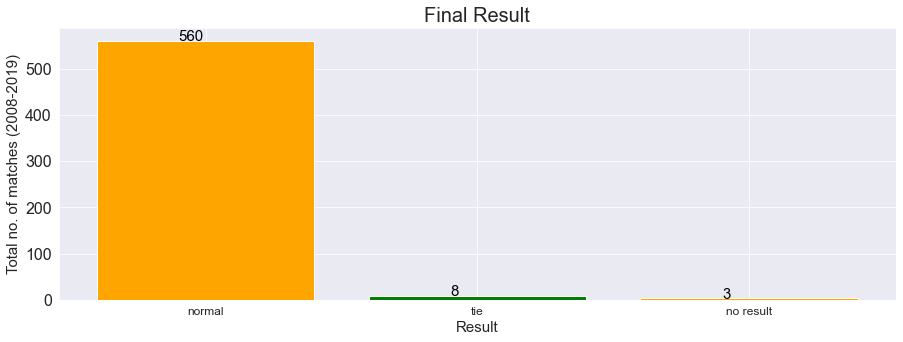

In [15]:
sns.set_style("darkgrid")
fig=plt.gcf()
fig.set_size_inches(15,5)
plt.xticks(rotation=0,fontsize=12)
plt.yticks(fontsize=16)
results=pd.DataFrame(data['result'].value_counts())
results['name']=results.index  # store index as ht in name
plt.bar(results['name'],results['result'],color=['orange','green'])
count=0
for i in results['result']:
    plt.text(count-0.10,i+0.1,str(i),size=15,color='black',rotation=0)
    count+=1
    
#  count-0.15 for center align
#  i+0.1 for Vertical Alignment

plt.title('Final Result',fontsize=20)
plt.xlabel('Result',fontsize=15)
plt.ylabel('Total no. of matches (2008-2019)',fontsize=15)

###                                  Total no. of wins by each team

Text(0, 0.5, 'Total no. of matches won(2008-2019)')

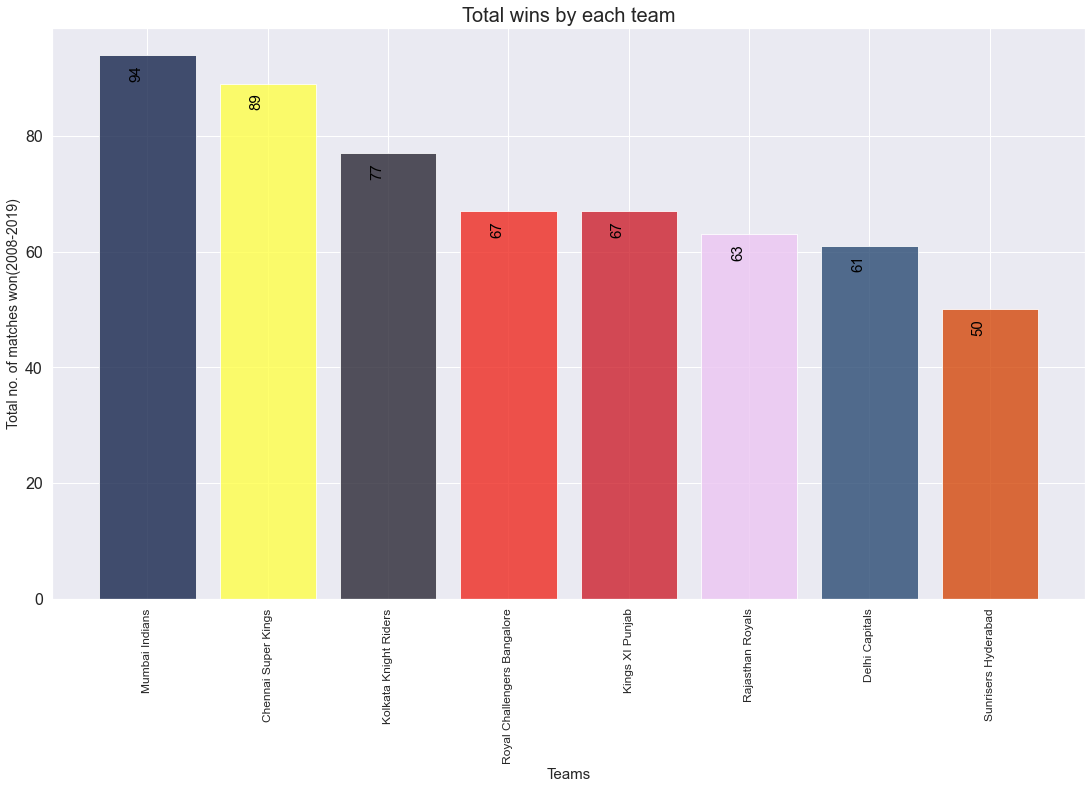

In [16]:
sns.set(style='darkgrid')
fig=plt.gcf()
fig.set_size_inches(18.5,10.5)
wins=pd.DataFrame(data['winner'].value_counts())
wins['name']=wins.index
plt.xticks(rotation=90,fontsize=12)
plt.yticks(fontsize=16)
plt.bar(wins['name'],
        wins['winner'],
        color=['#15244C','#FFFF48','#292734','#EF2920','#CD202D','#ECC5F2',
               '#294A73','#D4480B','#242307','#FD511F','#158EA6','#E82865',
               '#005DB7','#C23E25','#E82865']
        ,alpha=0.8)
count=0
for i in wins['winner']:
    plt.text(count-0.15,i-4,str(i),size=15,color='black',rotation=90)
    count+=1
plt.title('Total wins by each team',fontsize=20)
plt.xlabel('Teams',fontsize=15)
plt.ylabel('Total no. of matches won(2008-2019)',fontsize=14)
#plt.show()

### Top 20 players with most MOM awards

Text(0, 0.5, 'Total Awards Count')

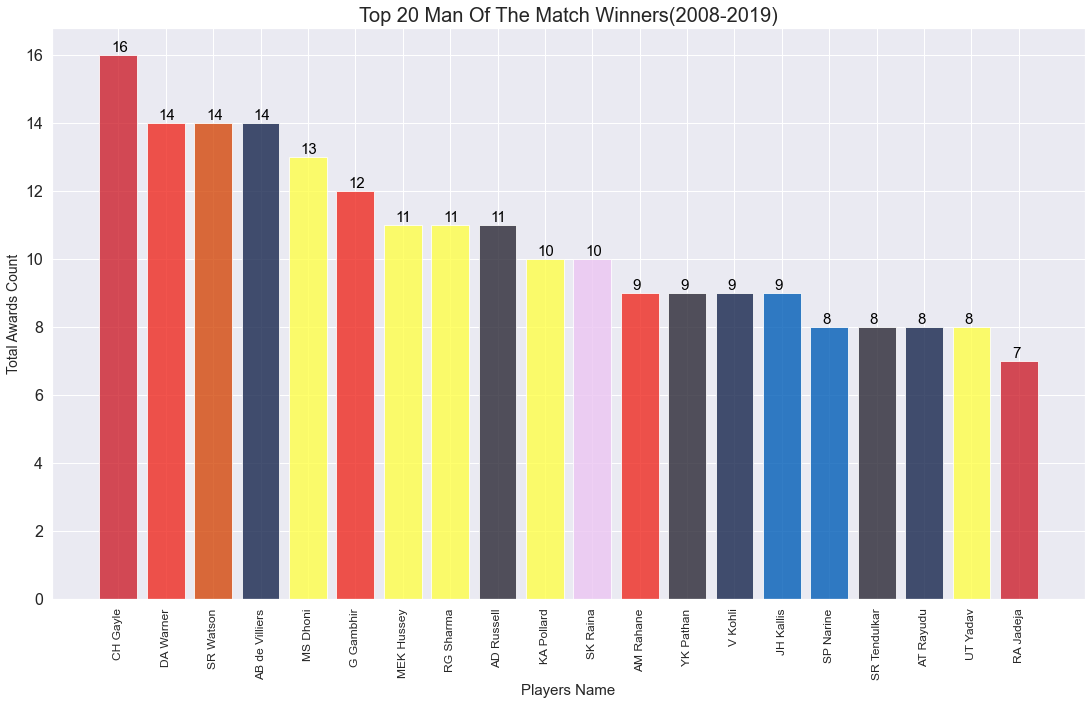

In [17]:
sns.set(style='darkgrid')
fig=plt.gcf()
fig.set_size_inches(18.5,10.5)
M_O_M=pd.DataFrame(data['player_of_match'].value_counts())
M_O_M['name']=M_O_M.index
M_O_M=M_O_M.head(20)
plt.xticks(rotation=90,fontsize=12)
plt.yticks(fontsize=16)
plt.bar(M_O_M['name'],M_O_M['player_of_match'],
        color=['#CD202D','#EF2920','#D4480B','#15244C','#FFFF48','#EF2920',
               '#FFFF48','#FFFF48','#292734','#FFFF48','#ECC5F2','#EF2920',
               '#292734','#15244C','#005DB7','#005DB7','#292734','#15244C',
               '#FFFF48','#CD202D'],alpha=0.8)
count=0
for i in M_O_M['player_of_match']:
    plt.text(count-0.15,i+0.1,str(i),size=15,color='black',rotation=0)
    count+=1
    
#  count-0.15 for center align
#  i+0.1 for Vertical Alignment

plt.title('Top 20 Man Of The Match Winners(2008-2019)',fontsize=20)
plt.xlabel('Players Name',fontsize=15)
plt.ylabel('Total Awards Count',fontsize=14)

### Matches hosted in each city

Here we found that two different names of same city (Bangalore and Bangaluru)
so we consider one unique name instead of two

In [18]:
data.at[data['city']=='Bengaluru','city']='Bangalore'

Text(0, 0.5, 'Total Number Of Matches Hosted')

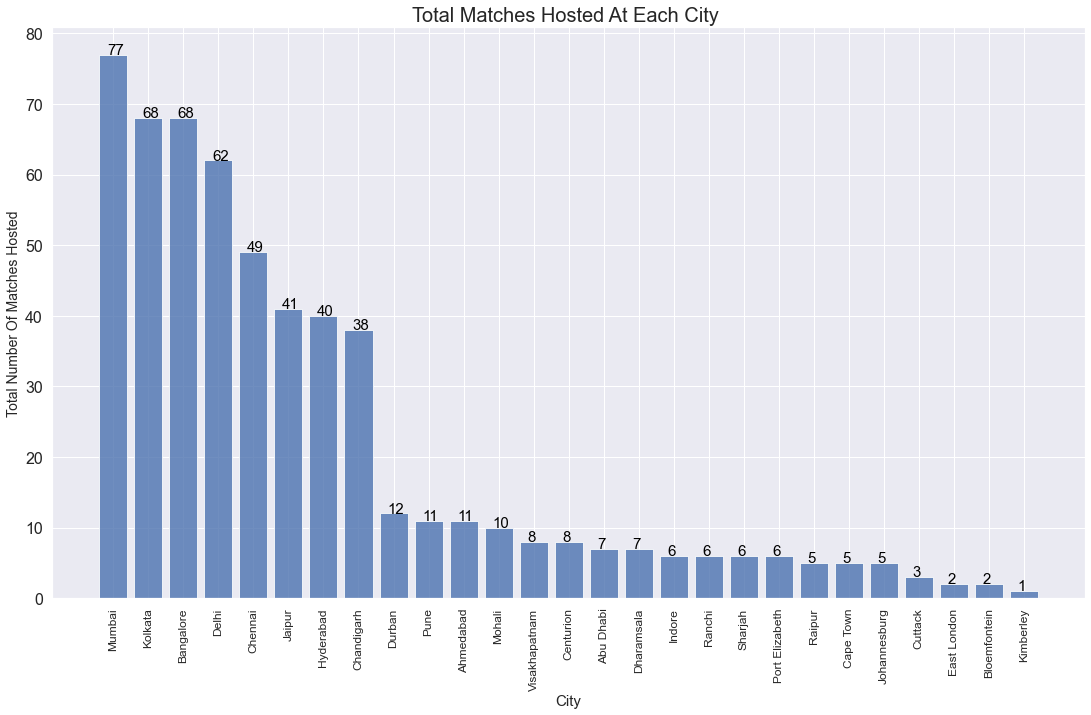

In [19]:
sns.set(style='darkgrid')
fig=plt.gcf()
fig.set_size_inches(18.5,10.5)
cities=pd.DataFrame(data['city'].value_counts())
cities['name']=cities.index
#cities=cities.head(10)
plt.xticks(rotation=90,fontsize=12)
plt.yticks(fontsize=16)
plt.bar(cities['name'],cities['city'],alpha=0.8)
count=0
for i in cities['city']:
    plt.text(count-0.18,i+0.1,str(i),size=15,color='black',rotation=0)
    count+=1
plt.title('Total Matches Hosted At Each City ',fontsize=20)
plt.xlabel('City',fontsize=15)
plt.ylabel('Total Number Of Matches Hosted',fontsize=14)

### No. of matches hosted at each stadium

Text(0, 0.5, 'Total Number Of Matches Hosted')

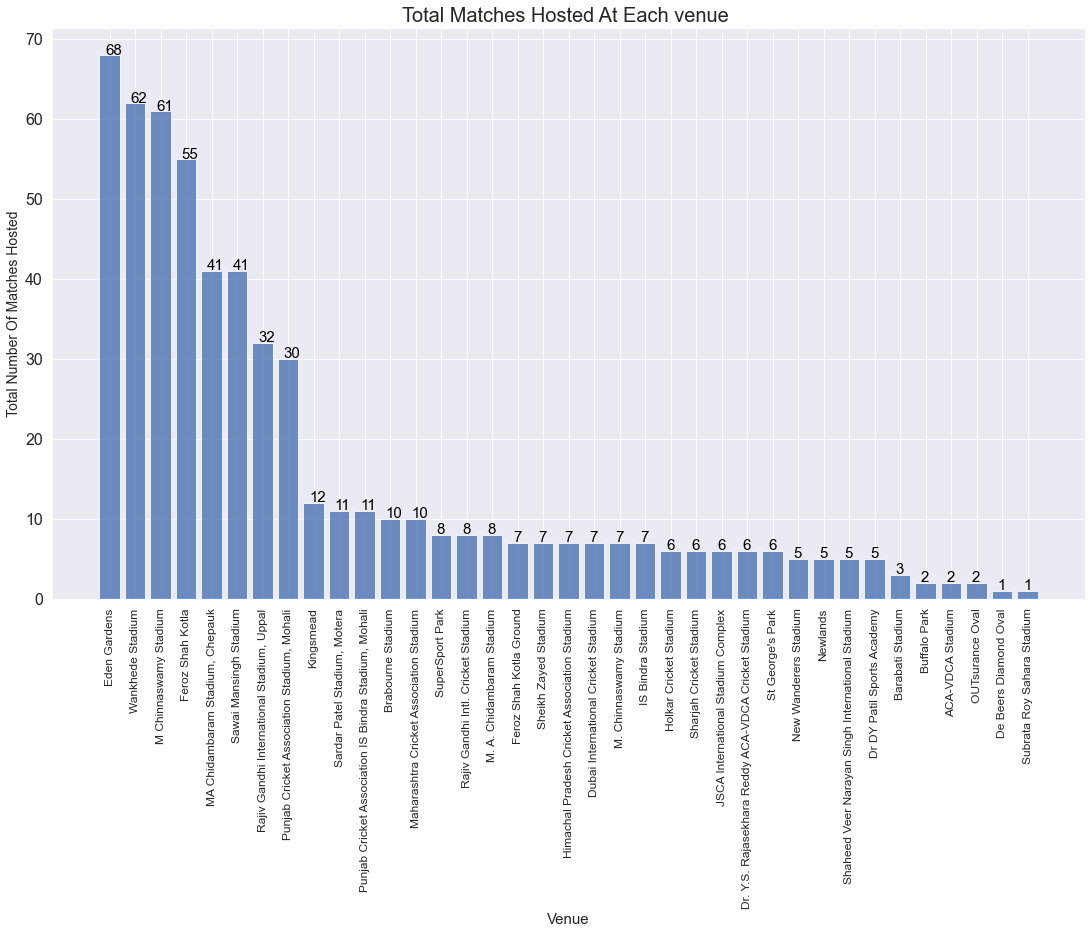

In [20]:
sns.set(style='darkgrid')
fig=plt.gcf()
fig.set_size_inches(18.5,10.5)
Venue=pd.DataFrame(data['venue'].value_counts())
Venue['name']=Venue.index
plt.xticks(rotation=90,fontsize=12)
plt.yticks(fontsize=16)
plt.bar(Venue['name'],Venue['venue'],alpha=0.8)
count=0
for i in Venue['venue']:
    plt.text(count-0.18,i+0.1,str(i),size=15,color='black',rotation=0)
    count+=1
plt.title('Total Matches Hosted At Each venue ',fontsize=20)
plt.xlabel('Venue',fontsize=15)
plt.ylabel('Total Number Of Matches Hosted',fontsize=14)

### MI vs CSK head to head

In [21]:
head_to_head = ['Mumbai Indians','Chennai Super Kings',]

In [22]:
# we consider only those matches played bitween MI and CSK
data_MIvsCSK = data[(data['team1'].isin(head_to_head)) & (data['team2'].isin(head_to_head))]

In [23]:
# we can also use this method to find head to head clash
# we consider only those matches played bitween MI and CSK
# data_MIvsCSK=data[np.logical_or
#       (np.logical_and(data['team1']=='Mumbai Indians',data['team2']=='Chennai Super Kings')
#                  ,np.logical_and(data['team2']=='Mumbai Indians',data['team1']=='Chennai Super Kings'))]

In [24]:
print(data_MIvsCSK['team1'].unique())
print(data_MIvsCSK['team2'].unique())

['Chennai Super Kings' 'Mumbai Indians']
['Mumbai Indians' 'Chennai Super Kings']


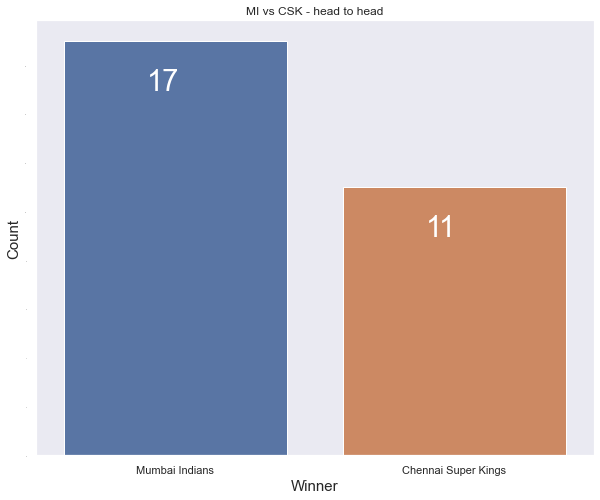

In [25]:
sns.set(style='dark')
fig=plt.gcf()
fig.set_size_inches(10,8)
sns.countplot(data_MIvsCSK['winner'],order=data_MIvsCSK['winner'].value_counts().index)
plt.text(-0.1,15,str(data_MIvsCSK['winner'].value_counts()['Mumbai Indians']),size=29,color='white')
plt.text(0.9,9,str(data_MIvsCSK['winner'].value_counts()['Chennai Super Kings']),size=29,color='white')
plt.xlabel('Winner',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.yticks(fontsize=0)
plt.title('MI vs CSK - head to head')
plt.show()

### MI vs CSK - Best performers

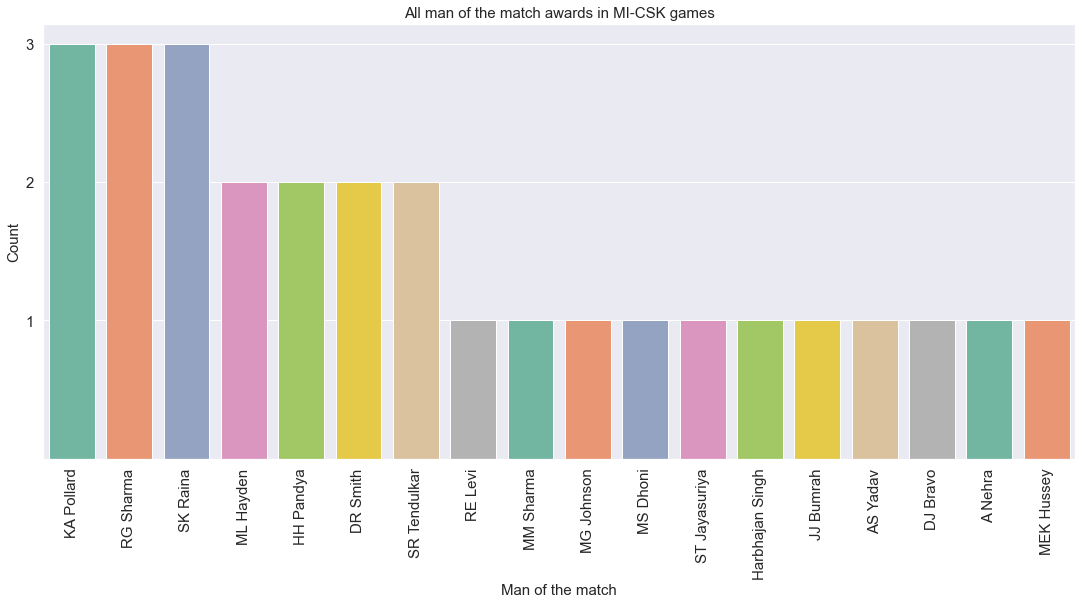

In [26]:
sns.set(style='darkgrid')
fig=plt.gcf()
fig.set_size_inches(18.5,8)
sns.countplot(data_MIvsCSK['player_of_match'],order=data_MIvsCSK['player_of_match'].value_counts().index,palette='Set2')
plt.title('All man of the match awards in MI-CSK games',fontsize=15)
plt.yticks([1,2,3],[1,2,3],fontsize=15)
plt.xticks(fontsize=15,rotation=90)
plt.xlabel('Man of the match',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.show()

### Toss decision statistics for all MIvCSK matches - Venue wise

this graph shows that what decision teams takes after winning toss

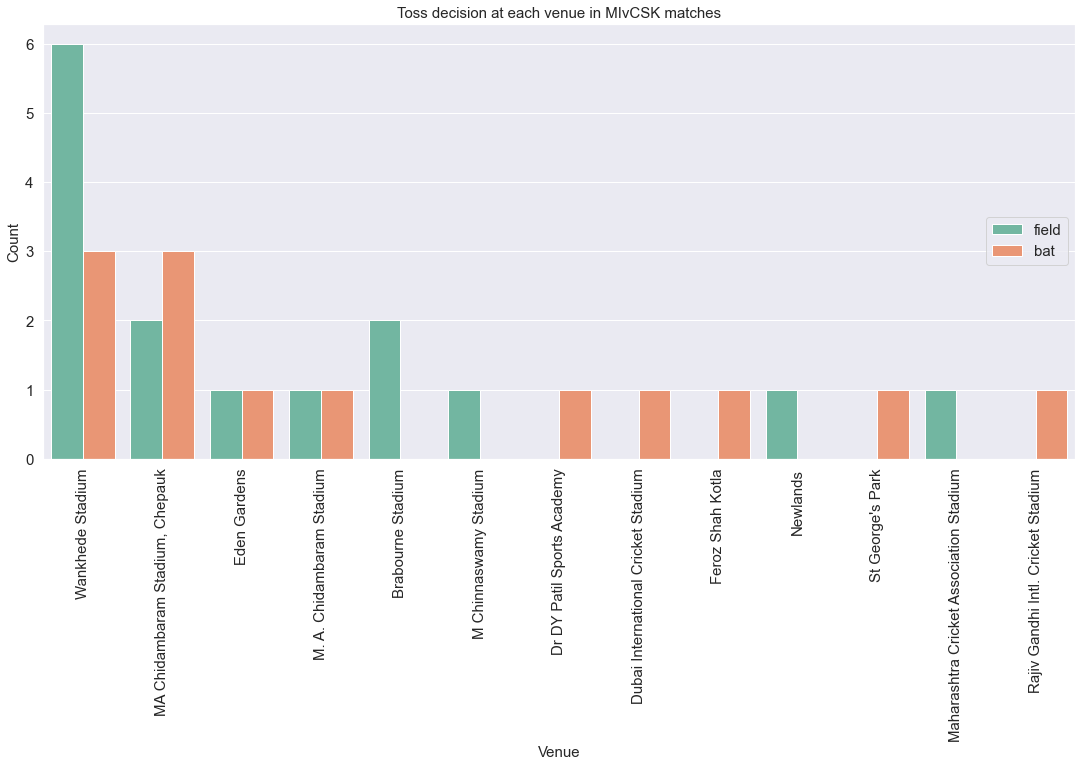

In [27]:
sns.set(style='darkgrid')
fig=plt.gcf()
fig.set_size_inches(18.5,8)
sns.countplot(data_MIvsCSK['venue'],order=data_MIvsCSK['venue'].value_counts().index,palette='Set2',hue=data['toss_decision'])
plt.title('Toss decision at each venue in MIvCSK matches',fontsize=15)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15,rotation=90)
plt.xlabel('Venue',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.legend(loc=5,fontsize=15)
plt.show()

### Decision upon winning the toss by both teams

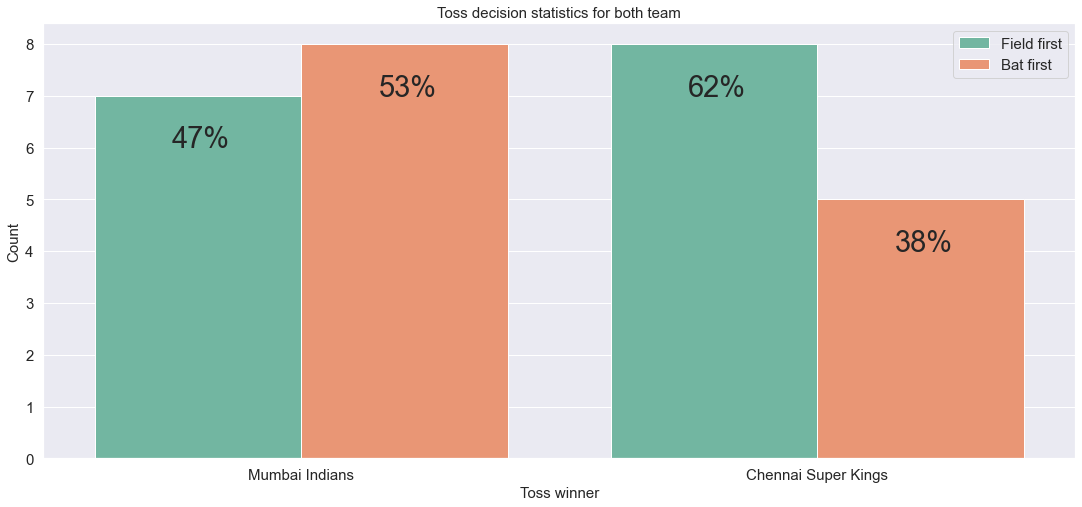

In [28]:
sns.set(style='darkgrid')
fig=plt.gcf()
fig.set_size_inches(18.5,8)
sns.countplot(data_MIvsCSK['toss_winner'],order=data_MIvsCSK['toss_winner'].value_counts().index,palette='Set2',hue=data['toss_decision'])
plt.title('Toss decision statistics for both team',fontsize=15)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.xlabel('Toss winner',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.text(-0.25,6,str(int((7/15)*100)+1)+'%',fontsize=29)
plt.text(0.15,7,str(int((8/15)*100))+'%',fontsize=29)
plt.text(0.75,7,str(int((8/13)*100)+1)+'%',fontsize=29)
plt.text(1.15,4,str(int((5/13)*100))+'%',fontsize=29)
plt.legend(['Field first','Bat first'],loc='best',fontsize=15)
plt.show()

# https://www.kaggle.com/darshanmankar/ipl-analysis-2008-2019